## Импорт библиотек и загрузка данных
Первым шагом проекта является импорт необходимых нам библиотек. В этом проекте мы будем использовать Lasio для чтения las-файлов, NumPy для работы с массивами, pandas для хранения данных, seaborn и matplotlib для отображения данных.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import lasio
import os

In [2]:
# Укажите пути к вашим файлам здесь
folder_path = 'las/'
excel_path = 'Отбивки пласта AC11-2.xlsx'

## Чтение и классификация las-файлов
Следующим шагом мы рассмотрим функцию `read_and_classify_las_files`, которая предназначена для чтения и классификации файлов формата `.las` в заданной директории. Функция разделяет файлы на две категории: **"continuous"** и **"discrete"**, основываясь на наличии этих слов в названиях файлов. В результате работы функции мы получаем два словаря: один для *непрерывных* (**continuous**) данных и один для *дискретных* (**discrete**) данных, где ключами являются определённые идентификаторы - *номера\названия скважин*, извлекаемые из названий файлов.

In [3]:
def read_and_classify_las_files(folder_path):
    # Инициализация словарей для хранения информации о файлах
    continuous_files = {}
    discrete_files = {}
    all_keys = set() # Множество для хранения уникальных ключей

    # Собираем все ключи из названий файлов, находящихся в заданной папке
    for filename in os.listdir(folder_path):
        if filename.endswith(".las"):
            key = filename.split("_")[0] # Получаем ключ из названия файла
            all_keys.add(key) # Добавляем ключ в множество
            
    # Инициализируем словари, ключи - уникальные идентификаторы, значения пока None
    for key in all_keys:
        continuous_files[key] = None
        discrete_files[key] = None

    # Перебор файлов для классификации и заполнения словарей
    for filename in os.listdir(folder_path):
        if filename.endswith(".las"):
            key = filename.split("_")[0]
            las_file_path = os.path.join(folder_path, filename) # Полный путь к файлу
            las_file = lasio.read(las_file_path) # Чтение содержимого LAS файла
            file_info = (las_file, filename) # Кортеж из объекта LAS и имени файла

            # Распределение файлов по словарям в зависимости от содержимого названия файла
            if "continuous" in filename:
                continuous_files[key] = file_info # Словарь с непрерывными данными
            elif "discrete" in filename:
                discrete_files[key] = file_info # Словарь с дискретными данными

    return continuous_files, discrete_files # Возврат словарей с классифицированными данными

Следующий фрагмент кода перед функций демонстрирует, как можно использовать эту функцию (`read_and_classify_las_files`) для извлечения и вывода информации о las-файлах из заданной директории. Он разделён на несколько частей, каждая из которых выполняет определённую задачу:

In [4]:
# Получаем словари с файлами: один для непрерывных данных, другой для дискретных
continuous_files, discrete_files = read_and_classify_las_files(folder_path)

# Печатаем содержимое словаря для непрерывных данных
print("Continuous файлы:")
for key, value in continuous_files.items():
    if value is not None:
        las_file, filename = value  # Распаковываем кортеж с информацией о файле
        print(f"Ключ: {key}, Файл: {filename} (Найден)") # Файл существует
    else:
        print(f"Ключ: {key}, Файл: Не найден") # Файл отсутствует

# Аналогично печатаем информацию для дискретных файлов
print("\nDiscrete файлы:")
for key, value in discrete_files.items():
    if value is not None:
        las_file, filename = value # Распаковываем кортеж с информацией о файле
        print(f"Ключ: {key}, Файл: {filename} (Найден)") # Файл существует
    else:
        print(f"Ключ: {key}, Файл: Не найден") # Файл отсутствует

Continuous файлы:
Ключ: 12, Файл: 12_continuous.las (Найден)
Ключ: 35, Файл: 35_continuous.las (Найден)
Ключ: K-66, Файл: K-66_continuous.las (Найден)
Ключ: 34, Файл: 34_continuous.las (Найден)
Ключ: 30, Файл: 30_continuous.las (Найден)
Ключ: 29, Файл: 29_continuous.las (Найден)
Ключ: K-101, Файл: K-101_continuous.las (Найден)
Ключ: 18, Файл: 18_continuous.las (Найден)
Ключ: 42, Файл: 42_continuous.las (Найден)
Ключ: 15, Файл: 15_continuous.las (Найден)
Ключ: 22, Файл: 22_continuous.las (Найден)
Ключ: 27, Файл: 27_continuous.las (Найден)
Ключ: 45, Файл: 45_continuous.las (Найден)
Ключ: K-10, Файл: K-10_continuous.las (Найден)
Ключ: 36, Файл: 36_continuous.las (Найден)
Ключ: 41, Файл: 41_continuous.las (Найден)
Ключ: K-44, Файл: K-44_continuous.las (Найден)
Ключ: 14, Файл: 14_continuous.las (Найден)
Ключ: 17, Файл: 17_continuous.las (Найден)
Ключ: 46, Файл: 46_continuous.las (Найден)
Ключ: 47, Файл: 47_continuous.las (Найден)
Ключ: 44, Файл: 44_continuous.las (Найден)
Ключ: 31, Файл: 31

## Чтение Excel-файла, содержащего информацию о геологических срезах различных скважин, и классификации этих данных в виде интервалов
Функция `read_excel_for_intervals` предназначена для чтения Excel-файла, содержащего информацию о геологических срезах различных скважин, и классификации этих данных в виде интервалов.
Данная функция позволяет организовать данные о глубинах начала и конца определенных пластов для каждой скважины в структурированной форме. Пользователь может использовать эти данные для анализа геологических слоев по каждой скважине.

In [5]:
excel_path = r'Отбивки пласта АС11-2.xlsx'

def read_excel_for_intervals(excel_path):
    # Чтение данных из Excel файла
    intervals_df = pd.read_excel(excel_path)
    # Инициализация словаря для хранения интервалов срезов по ключам (номерам скважин)
    intervals = {}

    # Итерация по строкам DataFrame
    for index, row in intervals_df.iterrows():
        # Получаем идентификатор скважины
        key = str(row['Well identifier'])
        # Если скважина встречается впервые, инициализируем для нее список интервалов
        if key not in intervals:
            intervals[key] = []
        # Добавляем начальную точку интервала, если встречается метка начала пласта 'АС11-1'
        if row['Surface'] == 'АС11-1':
            intervals[key].append({'start': row['MD'], 'end': None})
        # Если встретилась метка конца среза 'АС11-2', обновляем последний интервал для данной скважины
        elif row['Surface'] == 'АС11-2':
            for interval in reversed(intervals[key]): # Проверяем интервалы в обратном порядке
                if interval['end'] is None: # Находим первый незавершенный интервал
                    interval['end'] = row['MD'] # Устанавливаем конечную точку интервала
                    break # Прекращаем поиск после обновления интервала
    return intervals # Возвращаем словарь с интервалами для всех скважин

Этот блок кода использует функцию `read_excel_for_intervals`, чтобы извлечь интервалы из файла Excel и затем выводит эту информацию в удобном для чтения формате. 

In [6]:
# Получаем словарь интервалов для каждой скважины
intervals = read_excel_for_intervals(excel_path)

# Вывод информации об интервалах на экран
print("Интервалы срезов по скважинам:")
for key, value in intervals.items(): # Перебираем все скважины в словаре
    print(f"Скважина {key}:") # Выводим идентификатор скважины
    for interval in value: # Перебираем все интервалы текущей скважины
        start = interval['start'] # Начальная точка интервала
        # Конечная точка интервала; если не определена, выводим "не определен"
        end = interval['end'] if interval['end'] is not None else "не определен"
        print(f"    Начало: {start}, Конец: {end}") # Вывод информации о каждом интервале

Интервалы срезов по скважинам:
Скважина 11:
    Начало: 3153.43, Конец: 3198.17
Скважина 12:
    Начало: 3038.42, Конец: 3068.29
Скважина 13:
    Начало: 2735.19, Конец: 2753.13
Скважина 14:
    Начало: 2401.98, Конец: 2422.21
Скважина 15:
    Начало: 2482.17, Конец: 2500.02
Скважина 16:
    Начало: 2916.4, Конец: 2939.6
Скважина 17:
    Начало: 2540.7, Конец: 2564.3
Скважина 18:
    Начало: 3142.7, Конец: 3167.81
Скважина 19:
    Начало: 2601.66, Конец: 2627.55
Скважина 20:
    Начало: 2788.8, Конец: 2809.3
Скважина 22:
    Начало: 2607.4, Конец: 2624.33
Скважина 23:
    Начало: 2242.4, Конец: 2265.8
Скважина 24:
    Начало: 3022.4, Конец: 3057.73
Скважина 25:
    Начало: 2599.8, Конец: 2614.74
Скважина 26:
    Начало: 2212.8, Конец: 2226.53
Скважина 27:
    Начало: 2247.3, Конец: 2268.5
Скважина 28:
    Начало: 3201.3, Конец: 3241.32
Скважина 29:
    Начало: 2213.7, Конец: 2232.45
Скважина 30:
    Начало: 2739.1, Конец: 2779.7
Скважина 31:
    Начало: 2285.83, Конец: 2304.5
Скважина 

## Визуализация кривых ГИС-скважин
Далее инициализируем одну из функций для визуализации данных по скважинам - `plot_las_data1`. В данной функции строится  по одному графику из данных по las-файлам, но только в интервалах отбивок скважин, которые мы получили из excel-файла. Функция представляет данные о двух типах измерений: GGKP и NEU, на одном графике с общей осью глубины, но разными осями X для каждого параметра, что позволяет легко сравнивать эти параметры в рамках одного и того же интервала глубины. Она позволяет пользователю выбрать скважину для анализа, проверяет наличие данных, а затем строит графики по интересующим интервалам.

In [7]:
# Здесь выводится по одному графику вертикально
def plot_las_data1(continuous_files, intervals):
    # Запрашиваем у пользователя номер ключа скважины
    well_key = input("Введите номер ключа скважины: ")
    
    # Проверяем, существуют ли данные и интервалы для указанного ключа скважины
    if well_key not in continuous_files or well_key not in intervals:
        print(f"Нет данных или интервалов для скважины {well_key}.")
        return

    # Проходим по всем интервалам указанной скважины
    for interval in intervals[well_key]:
        if interval['end'] is None:  # Если конечная глубина интервала не указана, пропускаем этот интервал
            continue

        # Получаем данные LAS-файла для текущей скважины
        las_file, _ = continuous_files[well_key]  # Предполагаем, что первый элемент кортежа - это las_file
        dept = las_file['DEPT']
        ggkp = las_file['GGKP']
        neu = las_file['NEU']
        
        # Создаем маску для фильтрации данных по текущему интервалу
        mask = (dept >= interval['start']) & (dept <= interval['end'])
        filtered_dept = dept[mask]
        filtered_ggkp = ggkp[mask]
        filtered_neu = neu[mask]
        
        # Построение графика
        fig, ax1 = plt.subplots(figsize=(4, 12))
        
        color = 'tab:red'
        ax1.set_ylabel("Depth, м", labelpad=15)
        ax1.set_xlabel("GGKP", color=color, labelpad=20)
        ax1.plot(filtered_ggkp, filtered_dept, color=color, label='GGKP')
        ax1.invert_yaxis()  # Убеждаемся, что глубина увеличивается вниз
        ax1.tick_params(axis='x', colors=color)
        
        ax2 = ax1.twiny()  # Создаем вторую ось X для NEU
        color = 'tab:blue'
        ax2.set_xlabel("NEU, m3/m3", color=color, labelpad=20)
        ax2.xaxis.tick_top()  # Переместим подписи NEU наверх
        ax2.xaxis.set_label_position('top')  # Переместим подпись оси X NEU наверх
        ax2.plot(filtered_neu, filtered_dept, color=color, label='NEU')
        ax2.tick_params(axis='x', colors=color)
        
        plt.grid(True)
        fig.tight_layout()  # Автоматическая корректировка расположения подписей
        
        plt.show()  # Отображаем график

Введите номер ключа скважины:  12


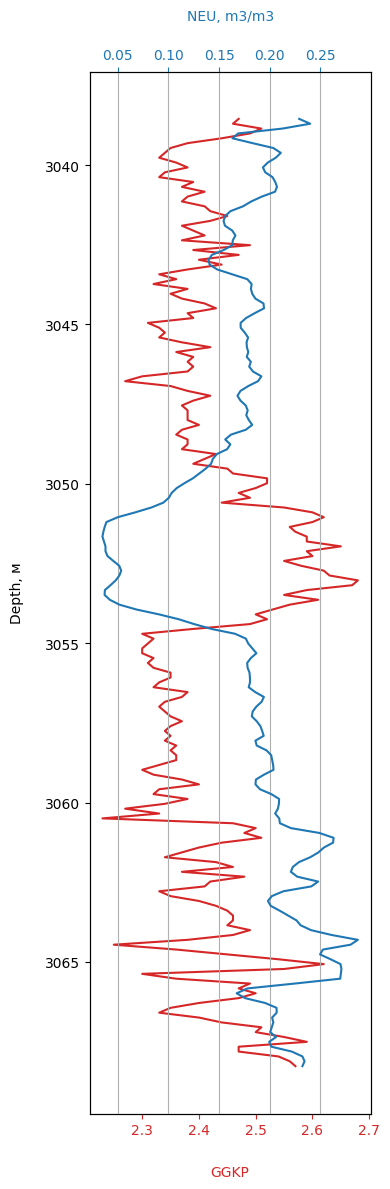

In [8]:
# Вызовем функцию
plot_las_data1(continuous_files, intervals)

Другая функция `plot_las_data2` предназначена для визуализации данных из las-файлов для нескольких скважин, позволяя пользователю выбрать, какие скважины анализировать, и выводя соответствующие графики вместе.

In [9]:
# Здесь можно выводить несколько графиков вместе вертикально
def plot_las_data2(continuous_files, intervals):
    # Запрашиваем у пользователя список номеров ключей скважин, разделенных запятой
    well_keys = input("Введите номера ключей скважин, разделенные запятой: ").split(',')
    
    # Определяем количество скважин для построения соответствующего количества подграфиков
    num_wells = len(well_keys)
    
    # Создаем фигуру с нужным количеством подграфиков
    fig, axes = plt.subplots(nrows=1, ncols=num_wells, figsize=(4 * num_wells, 12))
    
    # Если ключ всего один, оборачиваем axes в список
    if num_wells == 1:
        axes = [axes]
    
    for idx, well_key in enumerate(well_keys):
        well_key = well_key.strip()  # Удаляем лишние пробелы вокруг ключа
        # Проверяем, существуют ли данные и интервалы для указанного ключа скважины
        if well_key not in continuous_files or well_key not in intervals:
            print(f"Нет данных или интервалов для скважины {well_key}.")
            continue
        
        # Проходим по всем интервалам указанной скважины
        for interval in intervals[well_key]:
            if interval['end'] is None:  # Если конечная глубина интервала не указана, пропускаем этот интервал
                continue
            
            # Получаем данные LAS-файла для текущей скважины
            las_file, _ = continuous_files[well_key]  # Предполагаем, что первый элемент кортежа - это las_file
            dept = las_file['DEPT']
            ggkp = las_file['GGKP']
            neu = las_file['NEU']
            
            # Создаем маску для фильтрации данных по текущему интервалу
            mask = (dept >= interval['start']) & (dept <= interval['end'])
            filtered_dept = dept[mask]
            filtered_ggkp = ggkp[mask]
            filtered_neu = neu[mask]
            
            # Определяем текущую ось
            ax1 = axes[idx]
            
            # Первый график для GGKP
            color = 'tab:red'
            ax1.set_xlabel("GGKP", color=color)
            ax1.plot(filtered_ggkp, filtered_dept, color=color, label='GGKP')
            ax1.invert_yaxis()  # Убедимся, что глубина увеличивается вниз
            ax1.tick_params(axis='x', colors=color, labelbottom=True) # Отображаем метки на оси X
            
            # Создаем вторую ось X для NEU
            ax2 = ax1.twiny()  
            color = 'tab:blue'
            ax2.set_xlabel("NEU, m3/m3", color=color)
            ax2.plot(filtered_neu, filtered_dept, color=color, label='NEU')
            ax2.tick_params(axis='x', colors=color, labeltop=True) # Отображаем метки на верхней оси X
            
            # Отключаем метки на оси Y для всех графиков
            ax1.tick_params(labelleft=False)
            ax1.set_yticklabels([])  # Полностью убираем метки с оси Y
            ax1.grid(True)  # Включаем сетку для лучшей читаемости графика
            
    # Автоматическая корректировка расположения подписей
    fig.tight_layout()  
    plt.show()  # Отображаем график

Введите номера ключей скважин, разделенные запятой:  12, 13, 14, 15, 16


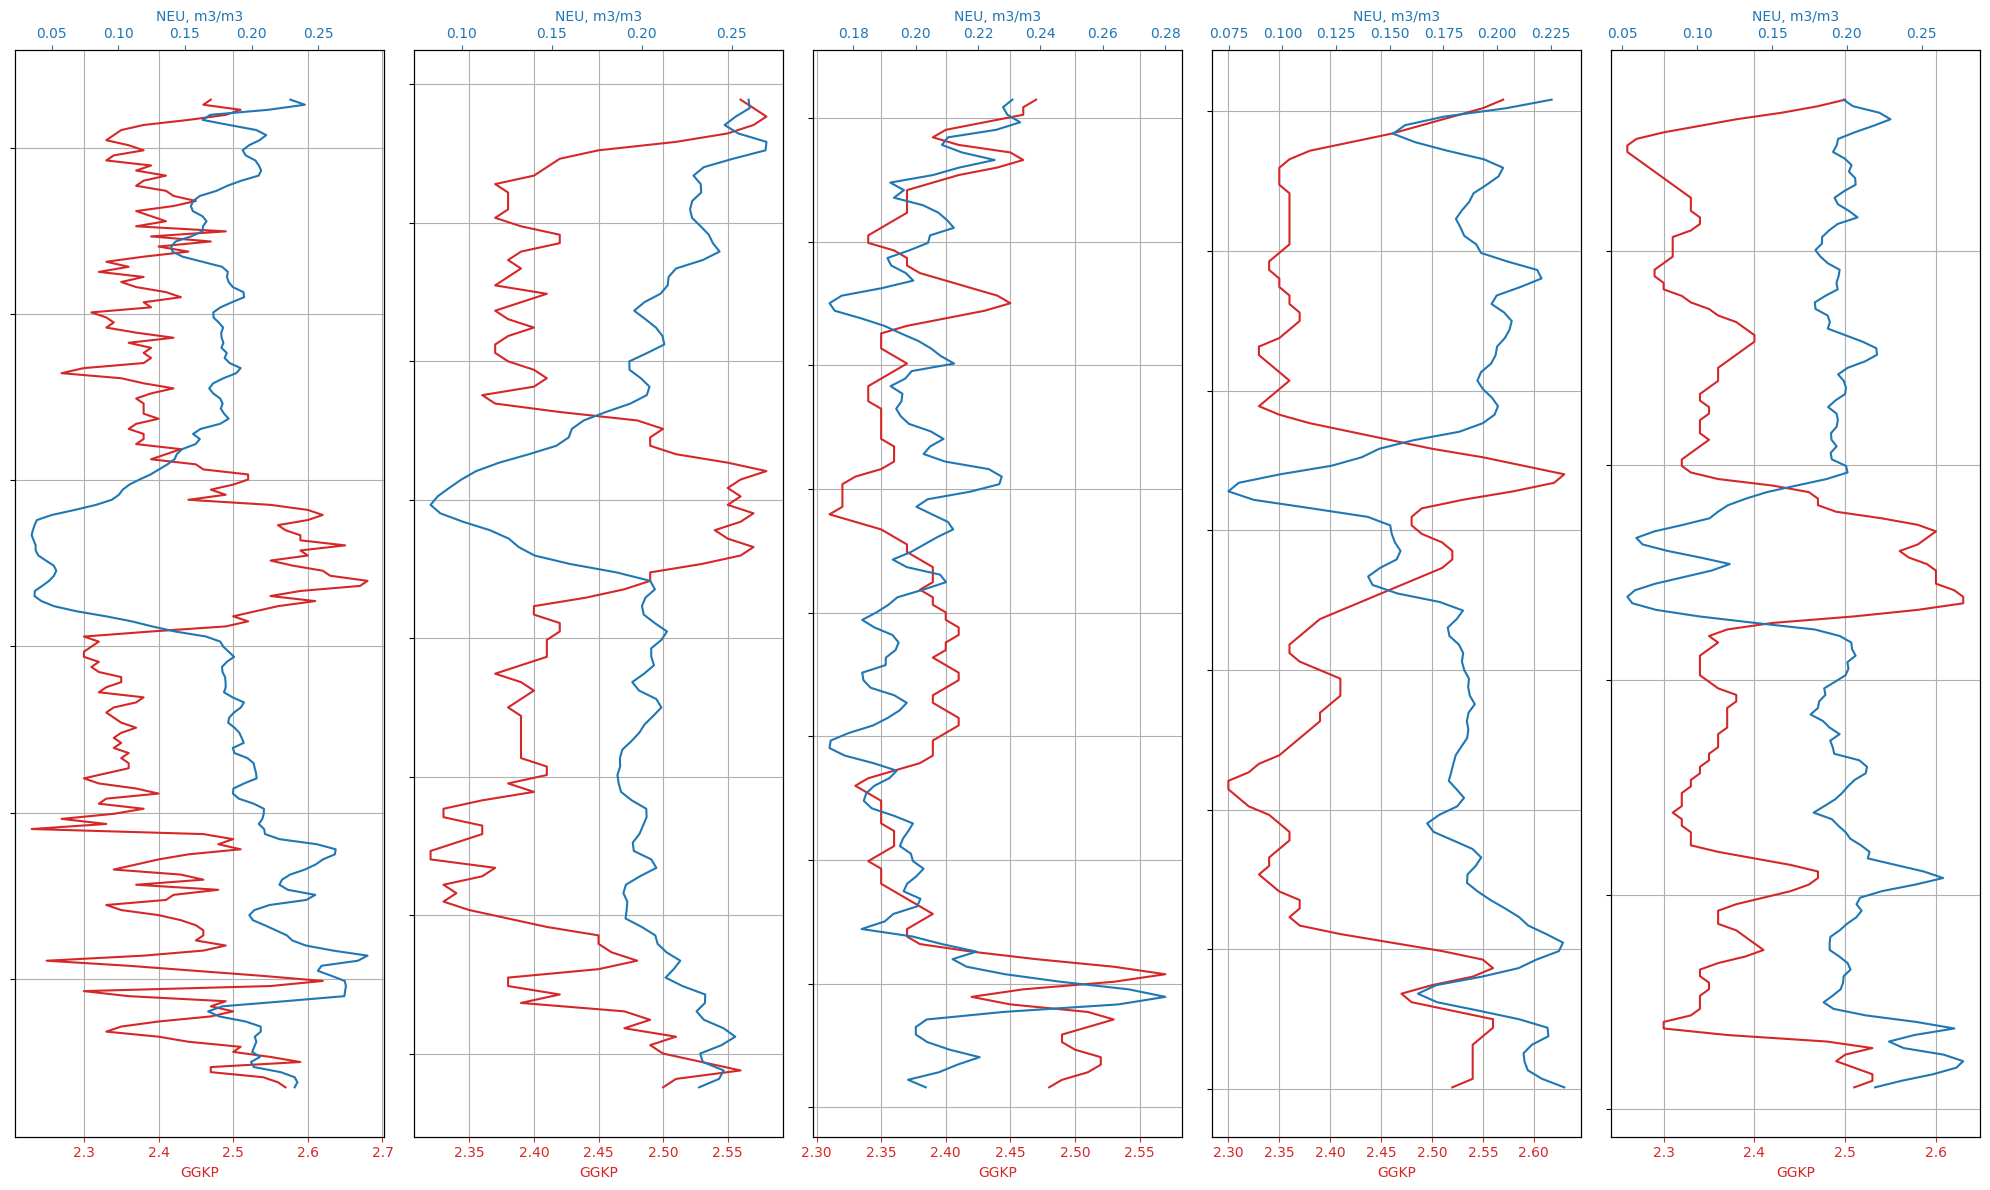

In [10]:
# Вызовем функцию
plot_las_data2(continuous_files, intervals)

## Создание csv-файлов по каждой скважине с учетом отбивок
Функция `save_intervals_to_csv` служит для сохранения агрегированных данных из las-файлов по определённым интервалам отбивок из excel-файла для каждой скважины в формате CSV. Она обрабатывает данные из словаря с файлами LAS, фильтрует их по заданным интервалам и сохраняет результаты в указанной директории. 
Эта функция охватывает основные случаи использования, включая обработку отсутствующих файлов и интервалов, а также предотвращение дублирования данных при агрегации.

In [19]:
def save_intervals_to_csv(continuous_files, intervals, output_dir='output_intervals_csv'):
    # Проверяем существование директории для выходных файлов, создаем если необходимо
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)

    # Перебор всех скважин в словаре с файлами
    for well_key, file_info in continuous_files.items():
        if file_info is None:
            print(f"Пропускаем {well_key}, файл не найден.") # Пропуск, если файл не найден
            continue
        
        las_file, _ = file_info # Распаковываем информацию о файле LAS
        df_las = las_file.df()  # Преобразуем содержимое LAS в DataFrame
        df_las.reset_index(inplace=True)  # Переносим глубину из индекса в отдельную колонку
        
        well_intervals = intervals.get(well_key, []) # Получаем интервалы для текущей скважины
        if not well_intervals:
            print(f"Для скважины {well_key} интервалы не определены.") # Если интервалы не определены, пропускаем
            continue

        # Агрегирование всех интервалов скважины в один DataFrame
        df_aggregated = pd.DataFrame()
        for interval in well_intervals:
            if interval['end'] is None:
                continue # Пропуск, если не указан конец интервала
            # Выборка данных из DataFrame по текущему интервалу
            df_interval = df_las[(df_las['DEPT'] >= interval['start']) & (df_las['DEPT'] <= interval['end'])]
            df_aggregated = pd.concat([df_aggregated, df_interval]) # Добавление данных интервала в общий DataFrame

        # Удаление возможных дубликатов после агрегации
        df_aggregated.drop_duplicates(inplace=True)

        # Сохранение обработанных данных в CSV, если есть данные для сохранения
        if not df_aggregated.empty:
            csv_file_path = os.path.join(output_dir, f"{well_key}.csv") # Формирование пути к выходному файлу
            df_aggregated.to_csv(csv_file_path, index=False) # Сохранение DataFrame в CSV
            print(f"Данные для скважины {well_key} сохранены в {csv_file_path}.")
        else:
            print(f"Данные для интервалов скважины {well_key} отсутствуют.") # Сообщение, если данные отсутствуют


In [20]:
# Вызовем функцию
save_intervals_to_csv(continuous_files, intervals)

Данные для скважины 12 сохранены в output_intervals_csv\12.csv.
Данные для скважины 35 сохранены в output_intervals_csv\35.csv.
Данные для скважины K-66 сохранены в output_intervals_csv\K-66.csv.
Данные для скважины 34 сохранены в output_intervals_csv\34.csv.
Данные для скважины 30 сохранены в output_intervals_csv\30.csv.
Данные для скважины 29 сохранены в output_intervals_csv\29.csv.
Данные для скважины K-101 сохранены в output_intervals_csv\K-101.csv.
Данные для скважины 18 сохранены в output_intervals_csv\18.csv.
Данные для скважины 42 сохранены в output_intervals_csv\42.csv.
Данные для скважины 15 сохранены в output_intervals_csv\15.csv.
Данные для скважины 22 сохранены в output_intervals_csv\22.csv.
Данные для скважины 27 сохранены в output_intervals_csv\27.csv.
Данные для скважины 45 сохранены в output_intervals_csv\45.csv.
Данные для скважины K-10 сохранены в output_intervals_csv\K-10.csv.
Данные для скважины 36 сохранены в output_intervals_csv\36.csv.
Данные для скважины 41 сох

In [21]:
# Функция для запроса у пользователя и вывода содержимого файла
def display_file_content(output_dir='output_intervals_csv'):
    # Создание списка всех .csv файлов в заданной директории
    csv_files = [f for f in os.listdir(output_dir) if f.endswith(".csv")]
    
    # Проверка на наличие файлов в списке
    if not csv_files:
        print("В указанной директории файлы .csv не найдены.")
        return

    # Вывод списка файлов для информации пользователя
    print("Доступные файлы в директории:")
    for file in csv_files:
        print(file)
    
    # Запрос у пользователя номера файла для просмотра
    file_number = input("Введите номер скважины или полное название файла для просмотра: ")
    selected_file = file_number + '.csv' if not file_number.endswith('.csv') else file_number
    
    # Проверка наличия файла в списке
    if selected_file in csv_files:
        # Чтение и вывод содержимого выбранного файла
        file_path = os.path.join(output_dir, selected_file)
        data = pd.read_csv(file_path)
        print(f"Содержимое файла {selected_file}:")
        print(data)
    else:
        print("Файл не найден. Убедитесь, что ввели корректное название файла.")

In [22]:
# Вызов функции
display_file_content()

Доступные файлы в директории:
12.csv
13.csv
14.csv
15.csv
16.csv
17.csv
18.csv
19.csv
20.csv
22.csv
23.csv
24.csv
25.csv
26.csv
27.csv
28.csv
29.csv
30.csv
31.csv
33.csv
34.csv
35.csv
36.csv
37.csv
38.csv
39.csv
40.csv
41.csv
42.csv
43.csv
44.csv
45.csv
46.csv
47.csv
48.csv
K-10.csv
K-101.csv
K-24042.csv
K-37.csv
K-44.csv
K-66.csv


Введите номер скважины или полное название файла для просмотра:  18


Содержимое файла 18.csv:
          DEPT        SSTVD            Z  GGKP
0    3142.7928  2146.949900 -2146.949900  2.44
1    3142.9452  2147.074213 -2147.074213  2.39
2    3143.0976  2147.198526 -2147.198526  2.35
3    3143.2500  2147.322839 -2147.322839  2.35
4    3143.4024  2147.447152 -2147.447152  2.39
..         ...          ...          ...   ...
160  3167.1768  2166.869571 -2166.869571  2.39
161  3167.3292  2166.994701 -2166.994701  2.44
162  3167.4816  2167.119831 -2167.119831  2.48
163  3167.6340  2167.244960 -2167.244960  2.55
164  3167.7864  2167.370090 -2167.370090  2.60

[165 rows x 4 columns]


## Проверка формата csv-файлов
В нашей задаче важно наличие колонок GGKP и NEU с данными, посколько именно исходя из данных будет происходить дальнейшее решение задачи кластеризации по формам ГИС.

In [23]:
# Проверка наличия колонки 'NEU' в каждом файле
files_without_NEU = []

# Путь к директории с CSV-файлами
output_dir = 'output_intervals_csv'
# Создание списка всех .csv файлов в заданной директории
csv_files = [f for f in os.listdir(output_dir) if f.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(output_dir, file)
    data_csv = pd.read_csv(file_path)
    
    if 'NEU' not in data_csv.columns:
        files_without_NEU.append(file)

# Вывод результатов
if files_without_NEU:
    print("Файлы без колонки 'NEU':", files_without_NEU)
else:
    print("В указанной директории файлов .csv формата без колонки 'NEU' нет.")

Файлы без колонки 'NEU': ['18.csv', '19.csv', '44.csv', '47.csv', '48.csv']


In [24]:
# Проверка наличия колонки 'GGKP' в каждом файле
files_without_GGKP = []

# Путь к директории с CSV-файлами
output_dir = 'output_intervals_csv'
# Создание списка всех .csv файлов в заданной директории
csv_files = [f for f in os.listdir(output_dir) if f.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(output_dir, file)
    data_csv = pd.read_csv(file_path)
    
    if 'GGKP' not in data_csv.columns:
        files_without_GGKP.append(file)

# Вывод результатов
if files_without_GGKP:
    print("Файлы без колонки 'GGKP':", files_without_GGKP)
else:
    print("В указанной директории файлов .csv формата без колонки 'GGKP' нет.")

В указанной директории файлов .csv формата без колонки 'GGKP' нет.


## Создание объединенного набора данных из файлов CSV
Этот код автоматически объединяет данные из различных CSV-файлов, каждый из которых содержит информацию о разных скважинах, в одну таблицу. Это упрощает анализ данных, так как все файлы приводятся к единой структуре с одинаковым набором колонок. Добавление колонки 'NEU' с нулевыми значениями в файлы, где она отсутствует, гарантирует, что все данные будут обрабатываться корректно, что критично для многих алгоритмов анализа и машинного обучения. Это обеспечивает однородность и точность в обработке и интерпретации данных.

In [1]:
# Задаем путь к директории с файлами CSV
csv_files_path = 'output_intervals_csv/'

# Список для хранения всех DataFrame'ов, которые будут созданы из каждого файла. 
dataframes = []

# Определяем список колонок, которые должны присутствовать в каждом DataFrame.
required_columns = ['DEPT', 'SSTVD', 'Z', 'NEU', 'GGKP'] 

# Перебираем все файлы в указанной директории.
for filename in os.listdir(csv_files_path): 
    if filename.endswith('.csv'):  # Обрабатываем только CSV-файлы.
        file_path = os.path.join(csv_files_path, filename)  # Получаем полный путь к файлу.
        df = pd.read_csv(file_path)  # Читаем файл в DataFrame.

        # Проверяем наличие необходимых колонок и добавляем их с NaN-значениями, если они отсутствуют.
        for column in required_columns: 
            if column not in df.columns:
                df[column] = np.nan 

        # Добавляем колонку 'WELL', содержащую имя файла (имя скважины), извлекаемое из названия файла.
        df['WELL'] = filename.split('.')[0] 

        # Перемещаем колонку 'WELL' на первую позицию в DataFrame для удобства анализа.
        cols = df.columns.tolist() 
        cols.insert(0, cols.pop(cols.index('WELL'))) 
        df = df[cols] 

        # Добавляем созданный DataFrame в список dataframes.
        dataframes.append(df) 

# Объединяем все DataFrame из списка в один общий DataFrame.
result_df = pd.concat(dataframes) 

# Сохраняем итоговый DataFrame в новый CSV-файл.
result_df.to_csv('combined.csv', index=False)
print('Объединенный файл сохранен как "combined.csv".')

NameError: name 'os' is not defined

Дальнейшие расчеты\подготовки данных логичнее выполнять в файлах-решениях, которые будут приложены отдельно:

`task1.ipynb`

`task2.ipynb`